In [1]:
import numpy as np
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

# Combine ALL Events

In [5]:
import os
path = r'D:\論文\PHEME9\Data\CSV'

In [6]:
import pathlib
data_temp = sorted(pathlib.Path(path).glob('*-2.csv'))

In [7]:
i = 0
all_data = pd.DataFrame()
size = 0 

In [8]:
while i <len(data_temp):
    rep = pd.read_csv(data_temp[i],encoding = 'utf-8', header = 0)
    src = pd.read_csv(data_temp[i+1], encoding = 'utf-8', header =0)
    df_merge = pd.merge(rep, src[['src_tweet_id','cleaned_src_tw','src_sentiment','src_emo_ro']],\
               on='src_tweet_id')
    length = rep.shape[0]
    size = size +length
    print(size)
    all_data = all_data.append(df_merge)
    i = i+2

33628
55357
58961
59125
69503
70126
70698
92055


In [9]:
all_data.shape

(92055, 15)

## Sentiment analysis

In [11]:
rumor_se = all_data.loc[all_data.label==1].groupby(['src_sentiment'])['reply_sentiment'].value_counts(normalize=True)\
.rename('count').reset_index().pivot('src_sentiment','reply_sentiment','count')

nonrumor_se =all_data.loc[all_data.label==0].groupby(['src_sentiment'])['reply_sentiment'].value_counts(normalize=True)\
.rename('count').reset_index().pivot('src_sentiment','reply_sentiment','count')

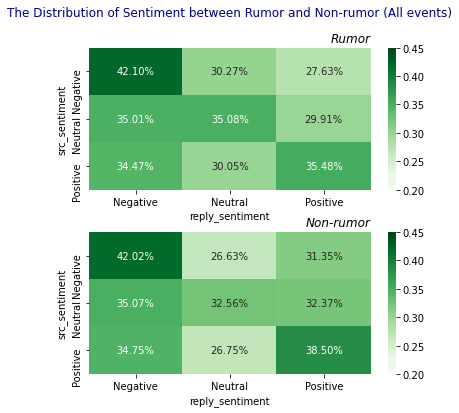

In [15]:
fig, axes = plt.subplots(2, 1)
fig.set_size_inches(7,6)
plt.title('The Distribution of Sentiment between Rumor and Non-rumor (All events)', color = 'darkblue',y=2.48)
sns.heatmap(ax=axes[0],data = rumor_se, annot=True,fmt='.2%',cmap='Greens',vmin=0.2, vmax = 0.45)
sns.heatmap(ax=axes[1],data = nonrumor_se, annot=True,fmt='.2%',cmap='Greens',vmin=0.2, vmax = 0.45)


axes[0].set_title('Rumor',fontstyle='italic',loc='right')
axes[1].set_title('Non-rumor',fontstyle='italic',loc='right')
plt.subplots_adjust(left=0.2,hspace=0.3)
plt.savefig('D:/論文/PHEME9/Code/graph/heatmap-sentiment-all.png',dpi=300)

## Emotion analysis

In [13]:
rumor_em = all_data.loc[all_data.label==1].groupby(['src_emo_ro'])['reply_emo_ro'].value_counts(normalize=True)\
.rename('count').reset_index().pivot('src_emo_ro','reply_emo_ro','count')

nonrumor_em =all_data.loc[all_data.label==0].groupby(['src_emo_ro'])['reply_emo_ro'].value_counts(normalize=True)\
.rename('count').reset_index().pivot('src_emo_ro','reply_emo_ro','count')

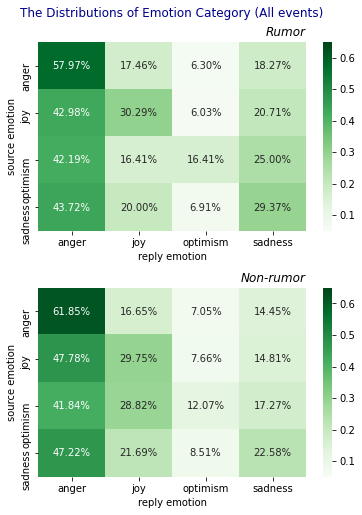

In [16]:
fig, axes = plt.subplots(2, 1)
fig.set_size_inches(6,8)
plt.title('The Distributions of Emotion Category (All events)', color='darkblue',y=2.4)
sns.heatmap(ax=axes[0],data = rumor_em, annot=True,fmt='.2%',vmin=0.05, vmax = 0.65,cmap='Greens')
sns.heatmap(ax=axes[1],data = nonrumor_em, annot=True,fmt='.2%',vmin=0.05, vmax = 0.65,cmap='Greens')

axes[0].set(xlabel = 'reply emotion',ylabel = 'source emotion')
axes[1].set(xlabel = 'reply emotion',ylabel = 'source emotion')
axes[0].set_title('Rumor',fontstyle='italic',loc='right')
axes[1].set_title('Non-rumor',fontstyle='italic',loc='right')

plt.subplots_adjust(hspace=0.3)
plt.savefig('D:/論文/PHEME9/Code/graph/heatmap-emotion-all.png',dpi=300)